## More on Implied Volatility

#### 1. It is an active area of research 

#### 2. Calibrating the volatility surface is done dfferently at different firms 

#### 3. Stochastic Volatility methods are often used

In [55]:
import numpy as np 
from scipy import integrate
import matplotlib.pyplot as plt

In [56]:
T = 1 
dt = np.array([0.1, 0.01, 0.001, 0.0001])

In [57]:
def my_fun(x):
    
    return np.exp(x)

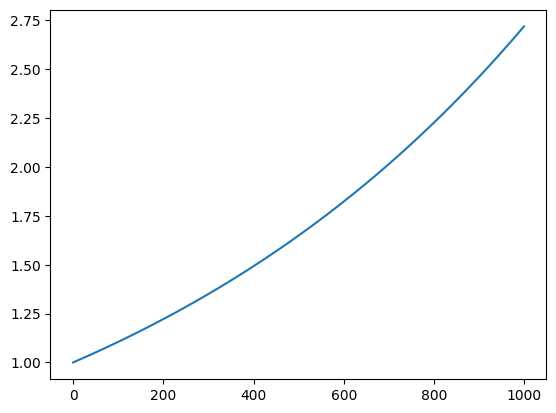

In [58]:
X = np.linspace(0, 1, 1000)
Y = my_fun(X)

plt.plot(Y)
plt.show()

In [59]:
integral = integrate.simpson(Y, X)
print("Integral: ", integral)

Integral:  1.718281828614413


## Part One

In [60]:
for i in range(4):

    integral = 0
    N = int(T / dt[i])
    X = np.linspace(0, T, N)
    rv = np.random.normal(0, 1, N)
    
    bm = np.zeros(N)
    bm[0] = 0
    
    for j in range(1, N):
        bm[j] = bm[j - 1] + rv[j] * np.sqrt(dt[i])
                    
    for j in range(1, N):
        
        # f(s) * dW_s * ds
        integral += my_fun(X[j]) * (bm[j] - bm[j - 1]) * (X[j] - X[j - 1])
        
    print("Integral: ", integral)

Integral:  0.18157239853617152
Integral:  0.005951932609853876
Integral:  0.0016328727531836305
Integral:  0.0002373158666834623


#### Looks like this is approaching zero

In [61]:
for i in range(4):

    integral = 0
    N = int(T / dt[i])
    X = np.linspace(0, T, N)
    rv = np.random.normal(0, 1, N)
    
    bm = np.zeros(N)
    bm[0] = 0
    
    for j in range(1, N):
        bm[j] = bm[j - 1] + rv[j]  * np.sqrt(dt[i])
                
    for j in range(1, N):
        
        # f(s) * dW_s^2
        integral += my_fun(X[j]) * (bm[j] - bm[j - 1])**2
        
    print("Integral: ", integral)

Integral:  0.7656240667902479
Integral:  1.859459074194769
Integral:  1.7158247392446115
Integral:  1.7464081332396586


#### Looks like this is approaching the integral

In [62]:
for i in range(4):

    integral = 0
    N = int(T / dt[i])
    X = np.linspace(0, T, N)
    rv = np.random.normal(0, 1, N)
    
    bm = np.zeros(N)
    bm[0] = 0
    
    for j in range(1, N):
        bm[j] = bm[j - 1] + rv[j]  * np.sqrt(dt[i])
                
    for j in range(1, N):
        
        # f(s) * ds^2
        integral += my_fun(X[j]) * (X[j] - X[j - 1])**2
        
    print("Integral: ", integral)

Integral:  0.20172326067391422
Integral:  0.01744418817410375
Integral:  0.0017208628356868362
Integral:  0.00017185396065355816


#### Looks like this is approaching zero

## Part Two

In [63]:
for i in range(4):

    integral = 0
    N = int(T / dt[i])
    X = np.linspace(0, T, N)
    rv = np.random.normal(0, 1, N)
    
    bm = np.zeros(N)
    bm[0] = 0
    
    for j in range(1, N):
        bm[j] = bm[j - 1] + rv[j] * np.sqrt(dt[i])
                
    for j in range(1, N):
        
        # f(W_s) * dW_s * ds
        integral += my_fun(bm[j]) * (bm[j] - bm[j - 1]) * (X[j] - X[j - 1])
        
    print("Integral: ", integral)

Integral:  -0.07663530063161776
Integral:  -0.004986929655740378
Integral:  0.0019100928453908029
Integral:  5.668352294000852e-05


#### This is for sure approaching zero

In [64]:
for i in range(4):

    integral = 0
    N = int(T / dt[i])
    X = np.linspace(0, T, N)
    rv = np.random.normal(0, 1, N)
    
    bm = np.zeros(N)
    bm[0] = 0
    
    for j in range(1, N):
        bm[j] = bm[j - 1] + rv[j] * np.sqrt(dt[i])
                
    for j in range(1, N):
        
        # F(W_s) * dW_s^2
        integral += my_fun(bm[j]) * (bm[j] - bm[j - 1])**2
        
    print("Integral: ", integral)

Integral:  1.247397339714895
Integral:  0.7860434578789944
Integral:  1.9989006421879085
Integral:  1.4822713149022941


#### Might be approaching the integral? 

In [65]:
for i in range(4):

    integral = 0
    N = int(T / dt[i])
    X = np.linspace(0, T, N)
    rv = np.random.normal(0, 1, N)
    
    bm = np.zeros(N)
    bm[0] = 0
    
    for j in range(1, N):
        bm[j] = bm[j - 1] + rv[j] * np.sqrt(dt[i])
                
    for j in range(1, N):
        
        # f(W_s) * ds^2
        integral += my_fun(bm[j]) * (X[j] - X[j - 1])**2
        
    print("Integral: ", integral)

Integral:  0.2411915822429316
Integral:  0.009330872908842266
Integral:  0.0009833220660246435
Integral:  5.8424725709896685e-05


#### Also approaching zero

## Part Three

In [66]:
T = 1
N = 10000
dt = T / N
X = np.linspace(0, T, N)

In [67]:
def ft(x, wt):
    
    return np.exp(wt)

In [68]:
def fx(x, wt):
    
    return x * np.exp(wt)

In [69]:
def fxx(x, wt):
    
    return x * np.exp(wt)

In [70]:
rv = np.random.normal(0, 1, N)

bm = np.zeros(N)
bm[0] = 0

for i in range(1, N):
    bm[i] = bm[i - 1] + rv[i] * np.sqrt(dt)

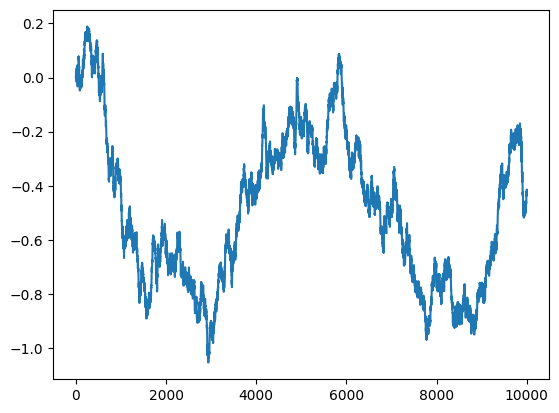

In [71]:
plt.plot(bm)
plt.show()

## Right Hand Integral

In [72]:
integral = 0

for i in range(N - 1):
    
        integral += (ft(X[i], bm[i]) + 0.5 * fxx(X[i], bm[i]) * (X[i + 1] - X[i])) + fx(X[i], bm[i]) * (bm[i + 1] - bm[i])
        
print("Right Hand Integral: ", integral)

Right Hand Integral:  6368.31977983244


## Left Hand Integral

In [73]:
integral = 0

for i in range(1, N):
    
        integral += (ft(X[i], bm[i]) + 0.5 * fxx(X[i], bm[i]) * (X[i] - X[i - 1])) + fx(X[i], bm[i]) * (bm[i] - bm[i - 1])
        
print("Left Hand Integral: ", integral)

Left Hand Integral:  6368.28109260674


## Comparison of Integral Methods

#### They are about the same. 